In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train.shape

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

y_train is a 2D array convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

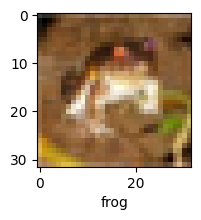

In [ ]:
plot_sample(X_train, y_train, 0)

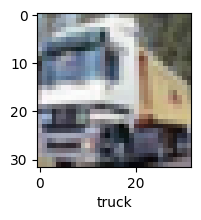

In [ ]:
plot_sample(X_train, y_train, 1)

Normalizing traning data from 0 to 1. RGB channels range from 0 to 255


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Fit Model and Iterations


In [ ]:
fitted = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 64s 40ms/step - loss: 1.4588 - accuracy: 0.4753 - val_loss: 1.1842 - val_accuracy: 0.5766
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1018 - accuracy: 0.6127 - val_loss: 1.0579 - val_accuracy: 0.6226
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9659 - accuracy: 0.6629 - val_loss: 0.9814 - val_accuracy: 0.6586
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8776 - accuracy: 0.6934 - val_loss: 0.9265 - val_accuracy: 0.6825
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8026 - accuracy: 0.7218 - val_loss: 0.9247 - val_accuracy: 0.6836
Epoch 6/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7479 - accuracy: 0.7407 - val_loss: 0.9380 - val_accuracy: 0.6790
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6946 - accuracy: 0.7599 - val_loss: 0.9361 -

Evaluate the Model

In [ ]:
test_loss, test_accuracy = cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.9448 - accuracy: 0.7001


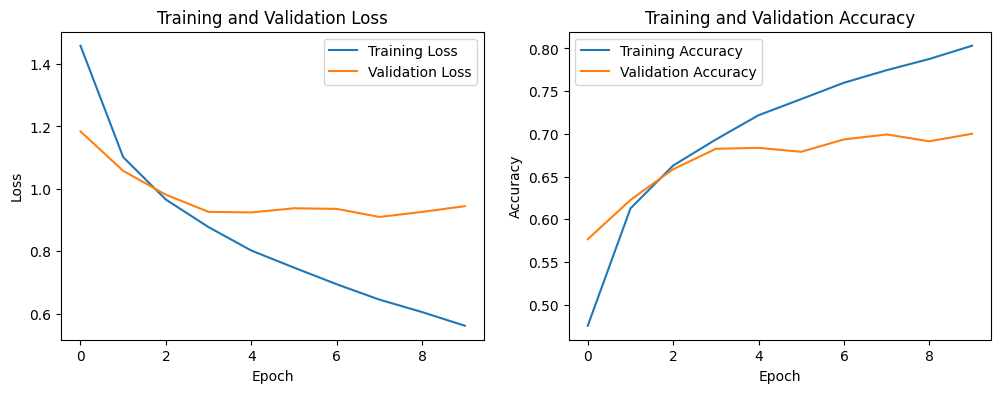

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fitted.history['loss'], label='Training Loss')
plt.plot(fitted.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(fitted.history['accuracy'], label='Training Accuracy')
plt.plot(fitted.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()